In [1]:
import altair as alt
import cnvutils
import cptac
import IPython.display
import numpy as np
import os
import pandas as pd

from cnvutils.filenames import (
    get_has_event_path,
    get_ttest_results_path,
    get_protein_ttest_boxplot_path,
)

from cnvutils.constants import (
    CHART_FORMAT,
    CHART_RENDER_METHOD,
    CHART_SCALE,
    SIG_CUTOFF,
)

from cnvutils.load_data import (
    get_cnv_counts,
    get_tables,
    get_ensembl_gene_locations,
    get_ncbi_gene_locations,
)

from cnvutils.chromosome_funcs import (
    select_genes_for_event,
)

In [101]:
def color_coded_df(
    prot,
    chromosome,
    arm,
    gain_or_loss,
    cis_or_trans,
    proteomics_or_transcriptomics,
    cancer_type,
    source,
    level=None,
    data_dir=os.path.join(os.getcwd(), "..", "data"),
):
    # Get ttest results to later pick which proteins to plot
    comparison_name = "tumor_vs_normal"
    has_ttest_results_path = get_ttest_results_path(
        data_dir=data_dir,
        source=source,
        level=level,
        chromosome=chromosome,
        arm=arm,
        gain_or_loss=gain_or_loss,
        cis_or_trans=cis_or_trans,
        proteomics_or_transcriptomics=proteomics_or_transcriptomics,
        group="has_event",
        comparison_name=comparison_name,
    )

    has = pd.read_csv(has_ttest_results_path, sep="\t")
        
    not_has_ttest_results_path = get_ttest_results_path(
        data_dir=data_dir,
        source=source,
        level=level,
        chromosome=chromosome,
        arm=arm,
        gain_or_loss=gain_or_loss,
        cis_or_trans=cis_or_trans,
        proteomics_or_transcriptomics=proteomics_or_transcriptomics,
        group="not_has_event",
        comparison_name=comparison_name,
    )

    not_has = pd.read_csv(not_has_ttest_results_path, sep="\t")
    
    for i, df in enumerate([has, not_has]):
        
        # Select our cancer type
        df = df[df["cancer_type"] == cancer_type]

        # Get the gene we want, and the next few
        df = df.sort_values(by="protein").reset_index(drop=True)
        idx = df[df["protein"] == prot].index[0]
        
        sel = df[df["protein"].isin([
            "CNOT7",
            "CTSB",
            "DEFB1",
            "DLC1",
            "DOCK5",
            "DOK2",
            "DUSP26",
        ])][["protein", "adj_p"]].\
        round(5).\
        set_index("protein")
    
        if i == 0:
            has = sel
        else:
            not_has = sel
            
    has = has.rename(columns={"adj_p": "p has event"})
    not_has = not_has.rename(columns={"adj_p": "p no event"})
    both = has.join(not_has)
    both.index.name = None

    return both.style.applymap(
        lambda x: f"background-color: {'#00a001' if x <= 0.05 else 'white'}"
    )

color_coded_df(
    prot="CNOT7",
    chromosome=8,
    arm="p",
    gain_or_loss="loss",
    cis_or_trans="cis",
    proteomics_or_transcriptomics="proteomics",
    cancer_type="hnscc",
    source="gistic",
    level="gene",
)

,p has event,p no event
CNOT7,0.542600,0.000040
CTSB,0.008430,0.005290
DEFB1,0.374410,0.342240
DLC1,0.266790,0.013760
DOCK5,0.276270,0.076630
DOK2,0.023790,0.001120
DUSP26,0.093860,0.013760


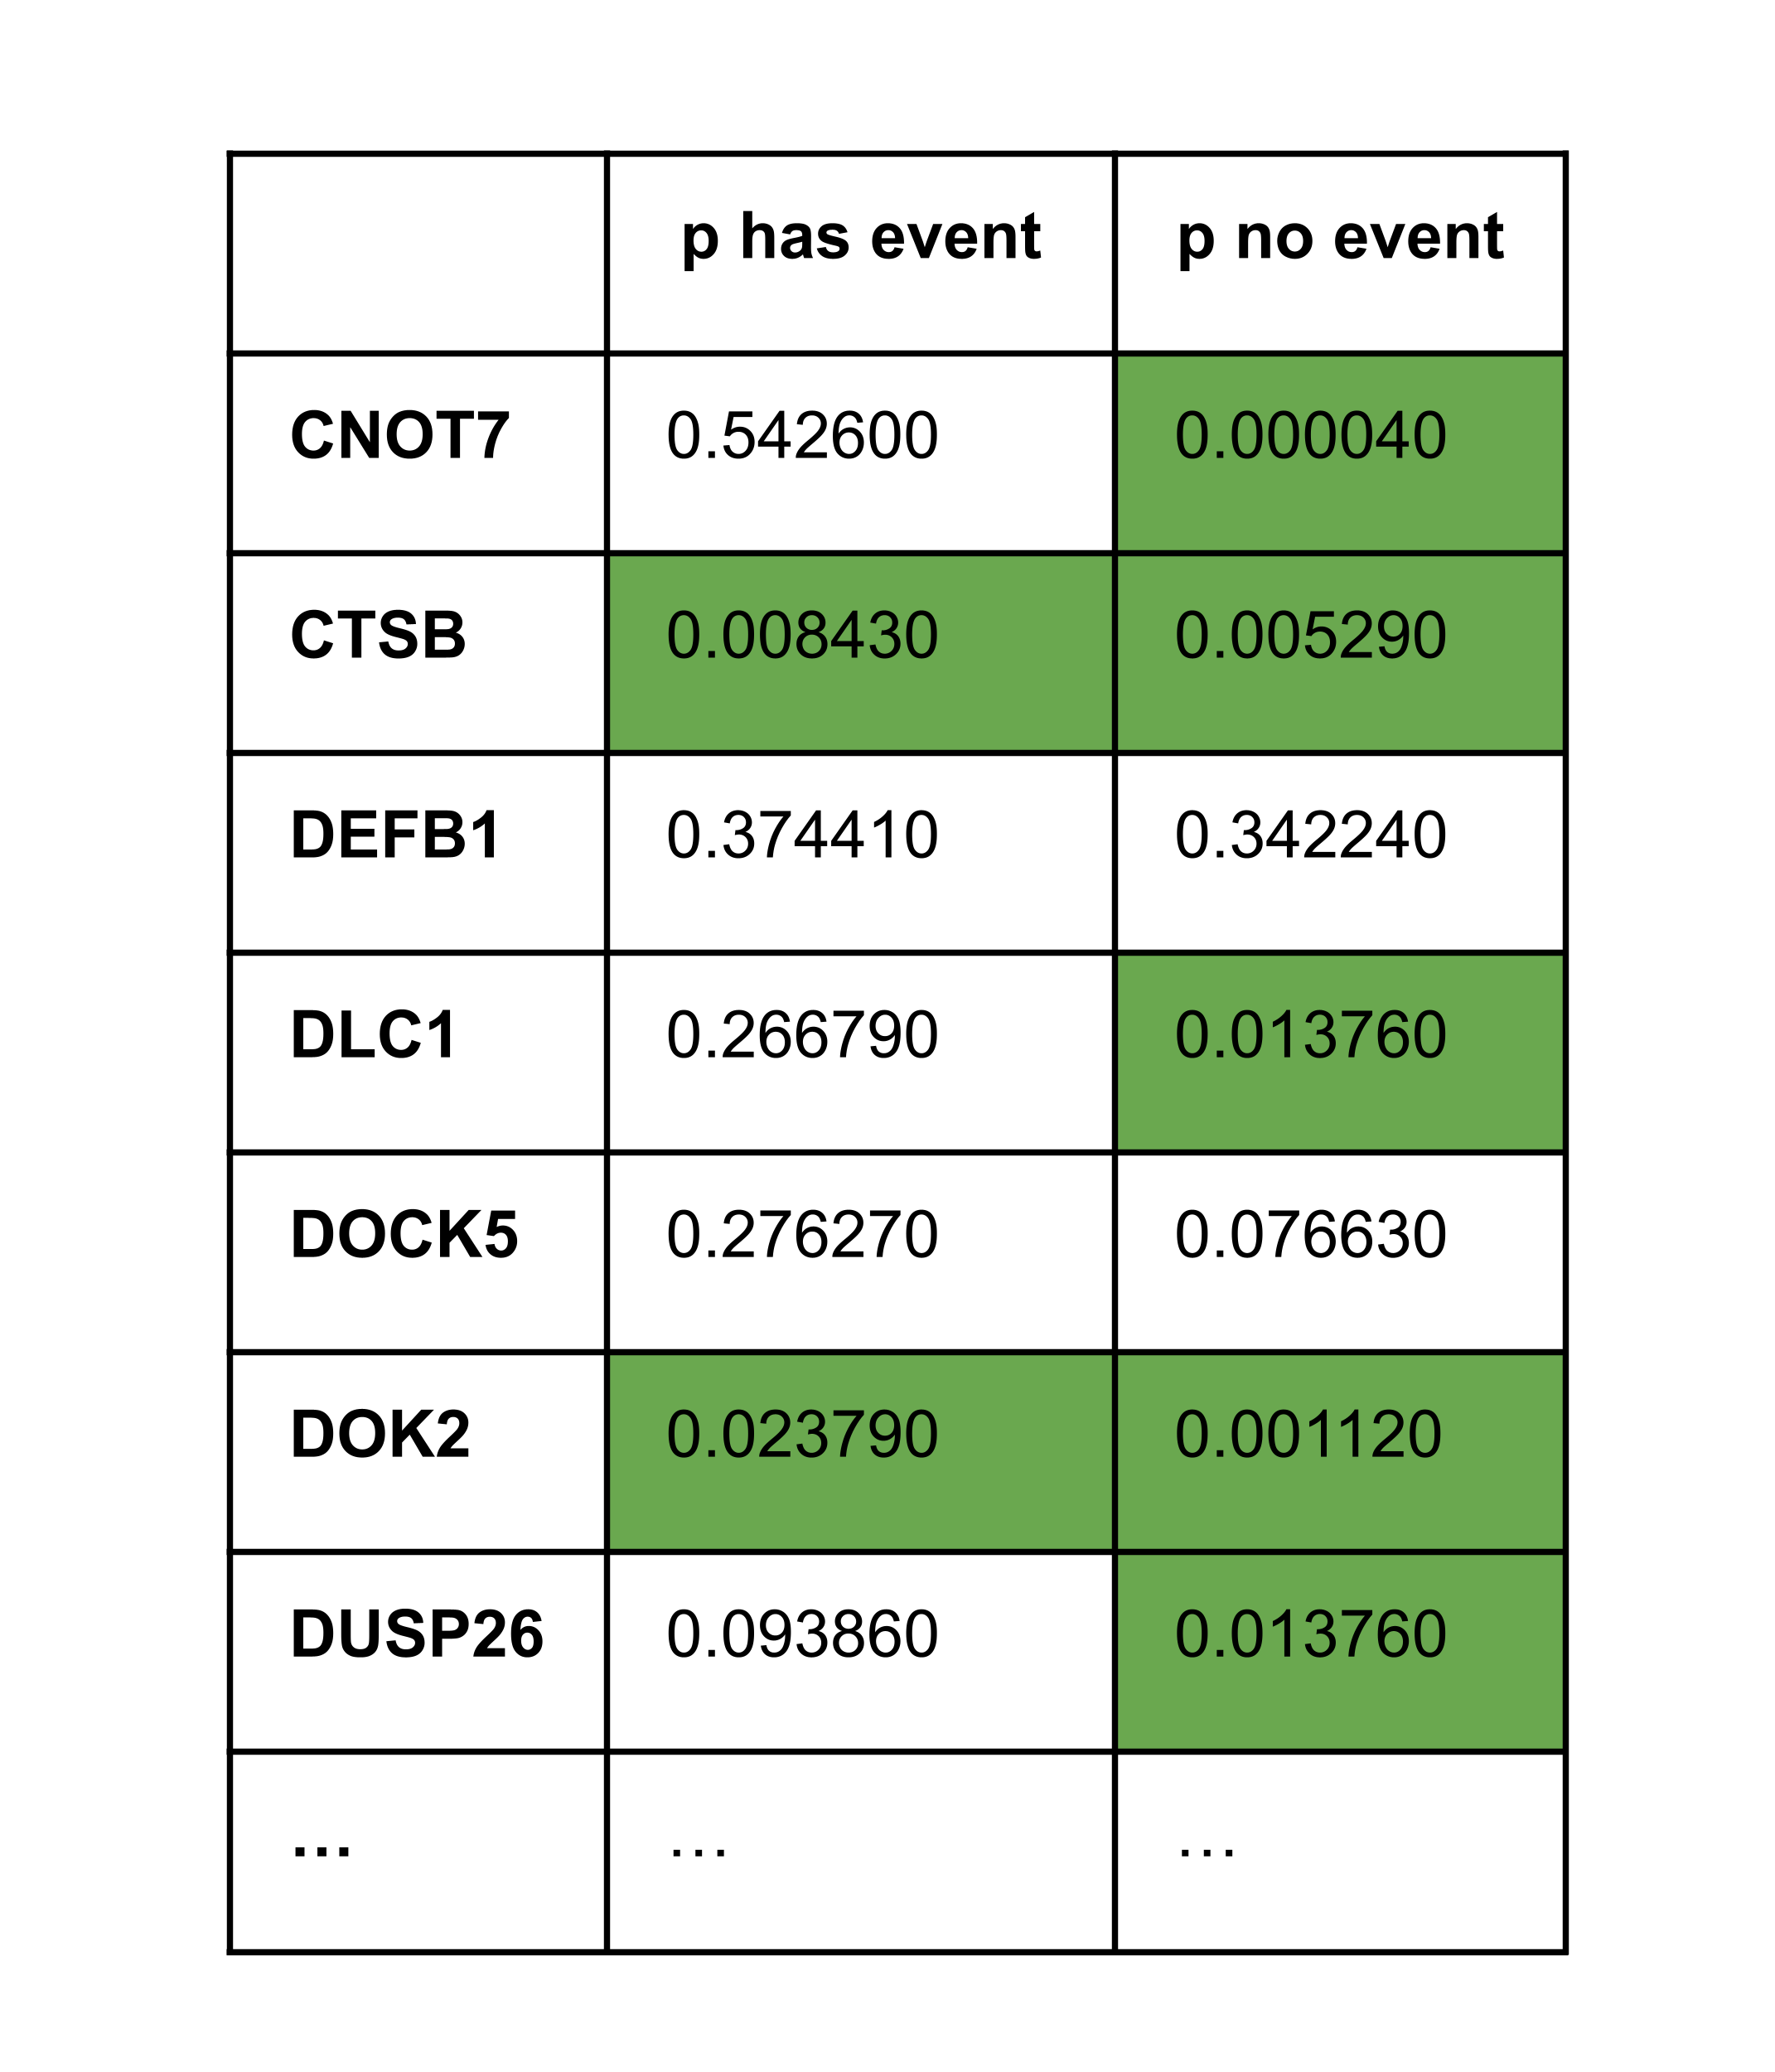

In [102]:
IPython.display.Image("/home/caleb/github/PayneLab/pancancerCNV/00_functions/data/charts_img/poster_pval_table.png")